# Proyecto: El costo de la cerveza en el mundo y su relación con el poder adquisitivo

**El costo de la cerveza alrededor del mundo y su relación con el costo de vida**

El precio de bienes de consumo cotidianos suele reflejar, en mayor o menor medida, las condiciones económicas de un país. Este trabajo analiza específicamente el costo de la cerveza en diversos países del mundo y su relación con el costo de vida, buscando responder preguntas como: ¿Existe una correlación directa entre el precio de la cerveza y el nivel general de vida en un país? ¿Cuántas cervezas se pueden comprar con un salario promedio, y qué nos revela esto sobre la accesibilidad al ocio en distintas economías?

La investigación parte de la hipótesis de que, aunque en países con mayor costo de vida la cerveza tiende a tener precios más altos, la cantidad de cervezas que una persona puede adquirir con su salario promedio es también mayor, reflejando un mayor poder adquisitivo relativo.

Utilizando datos internacionales sobre precios promedio de la cerveza y salarios mensuales por país, se construyó un índice de accesibilidad que permite comparar no solo los precios absolutos, sino también la proporción de cervezas que se pueden adquirir con un salario medio. Los resultados preliminares evidencian fuertes contrastes entre países, revelando que no siempre un alto costo de vida implica menor acceso a estos bienes. Este análisis abre la puerta a reflexionar sobre la economía mundial y cómo el acceso a productos culturales o recreativos puede variar drásticamente de una economía a otra.

En conclusión, este estudio no solo busca entender el precio de la cerveza como un dato aislado, sino como una ventana para explorar las desigualdades y particularidades económicas que atraviesan el consumo cotidiano en el mundo.

# 1. Preparación de la información

En primer lugar, importamos las bibliotecas y montamos el dataset elegido en google colab

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Costo_de_vida.csv', encoding='latin1')



Luego de importar las bibliotecas y montar el dataset en colab, lo primero se hizo fue redefinir los nombres de algunas columnas.

In [19]:
df.rename(columns={'city': 'Ciudad'}, inplace=True)
df.rename(columns={'country': 'Pais'}, inplace=True)
df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

A partir de aquí se realizó la revisión inicial.

In [20]:
df.head()

,ID,Ciudad,Pais,Comida,Comida para 2,Big Mac,Cerveza Local Restaurante,Cerveza Importada Restaurante,Capuccino,Gaseosa,...,Zapatos de cuero,Monoambiente centro,Monoambiente afueras,3 ambientes centro,3 ambientes afueras,Metro cuadrado centro,Metro cuadrado afueras,Salario neto promedio,Hipoteca,data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


# 2. Primera aproximación

En la primera aproximación, se averiguó la cantidad de filas y columnas.

In [21]:
df.shape

(4874, 59)

Luego se utilizó df.info() para ver la cantidad de datos nulos de cada columna.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              4874 non-null   int64  
 1   Ciudad                          4874 non-null   object 
 2   Pais                            4874 non-null   object 
 3   Comida                          4449 non-null   float64
 4   Comida para 2                   4432 non-null   float64
 5   Big Mac                         4552 non-null   float64
 6   Cerveza Local Restaurante       4385 non-null   float64
 7   Cerveza Importada Restaurante   4445 non-null   float64
 8   Capuccino                       4540 non-null   float64
 9   Gaseosa                         4438 non-null   float64
 10  Agua                            4571 non-null   float64
 11  Leche                           4494 non-null   float64
 12  Pan                             44

Se utilizó el siguiente codigo para ver estadísticas descripitvas como el conteo, la media, la desviación estandar, étc.

In [23]:
df.describe()

,ID,Comida,Comida para 2,Big Mac,Cerveza Local Restaurante,Cerveza Importada Restaurante,Capuccino,Gaseosa,Agua,Leche,...,Zapatos de cuero,Monoambiente centro,Monoambiente afueras,3 ambientes centro,3 ambientes afueras,Metro cuadrado centro,Metro cuadrado afueras,Salario neto promedio,Hipoteca,data_quality
count,4874.000000,4449.000000,4432.000000,4552.000000,4385.000000,4445.000000,4540.000000,4438.000000,4571.000000,4494.000000,...,4337.000000,3533.000000,3465.000000,3418.000000,3385.000000,2681.000000,2609.000000,3459.000000,3894.000000,4874.000000
mean,2436.500000,10.321643,43.213592,6.875426,3.376732,3.937287,2.742822,1.513053,1.110768,1.139455,...,85.420108,710.696156,559.472898,1252.427627,973.603867,3207.173025,2323.089766,1817.033501,6.527214,0.186705
std,1407.146936,7.165507,25.365827,2.669017,2.080606,2.088773,1.353734,0.905525,0.749957,0.513458,...,40.328050,650.404203,529.592777,1222.803640,926.552107,6222.564176,3536.720519,1626.482870,5.423472,0.389714
min,0.000000,0.450000,3.250000,1.060000,0.320000,0.310000,0.220000,0.110000,0.070000,0.260000,...,7.570000,21.690000,12.200000,61.200000,27.110000,109.530000,48.010000,18.000000,0.600000,0.000000
25%,1218.250000,4.310000,22.350000,4.910000,1.590000,2.220000,1.560000,0.750000,0.470000,0.820000,...,57.620000,254.440000,168.970000,465.720000,325.920000,1118.030000,778.890000,478.255000,3.000000,0.000000
50%,2436.500000,9.830000,40.000000,6.960000,3.000000,3.640000,2.630000,1.450000,1.040000,1.040000,...,83.100000,519.350000,400.000000,934.000000,720.710000,2077.390000,1558.040000,1298.370000,5.210000,0.000000
75%,3654.750000,15.000000,60.000000,8.500000,5.000000,5.190000,3.722500,2.080000,1.570000,1.300000,...,106.670000,986.760000,791.670000,1700.000000,1367.330000,3782.820000,2796.500000,2742.500000,8.497500,0.000000
max,4873.000000,56.980000,211.350000,21.810000,15.000000,17.500000,10.000000,8.000000,5.770000,6.810000,...,542.740000,12608.830000,8989.370000,27006.110000,17868.180000,237522.540000,79174.180000,12681.260000,61.330000,1.000000


In [24]:
df.isna().sum()

,0
ID,0
Ciudad,0
Pais,0
Comida,425
Comida para 2,442
Big Mac,322
Cerveza Local Restaurante,489
Cerveza Importada Restaurante,429
Capuccino,334
Gaseosa,436


Aquí reemplacé los datos nulos con la media de los datos para luego revisar si se añadieron.

In [25]:
columnas_numericas = df.select_dtypes(include=['number'])
for columna in columnas_numericas.columns:
  df[columna] = df[columna].fillna(df[columna].mean())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              4874 non-null   int64  
 1   Ciudad                          4874 non-null   object 
 2   Pais                            4874 non-null   object 
 3   Comida                          4874 non-null   float64
 4   Comida para 2                   4874 non-null   float64
 5   Big Mac                         4874 non-null   float64
 6   Cerveza Local Restaurante       4874 non-null   float64
 7   Cerveza Importada Restaurante   4874 non-null   float64
 8   Capuccino                       4874 non-null   float64
 9   Gaseosa                         4874 non-null   float64
 10  Agua                            4874 non-null   float64
 11  Leche                           4874 non-null   float64
 12  Pan                             48

Volví a observar con 'describe' para ver como cambiaron los valores.

In [27]:
df.describe()

,ID,Comida,Comida para 2,Big Mac,Cerveza Local Restaurante,Cerveza Importada Restaurante,Capuccino,Gaseosa,Agua,Leche,...,Zapatos de cuero,Monoambiente centro,Monoambiente afueras,3 ambientes centro,3 ambientes afueras,Metro cuadrado centro,Metro cuadrado afueras,Salario neto promedio,Hipoteca,data_quality
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,...,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000
mean,2436.500000,10.321643,43.213592,6.875426,3.376732,3.937287,2.742822,1.513053,1.110768,1.139455,...,85.420108,710.696156,559.472898,1252.427627,973.603867,3207.173025,2323.089766,1817.033501,6.527214,0.186705
std,1407.146936,6.845909,24.188097,2.579328,1.973454,1.994712,1.306518,0.864066,0.726267,0.493032,...,38.041152,553.726720,446.511644,1023.955319,772.123587,4614.647963,2587.356844,1370.136331,4.847540,0.389714
min,0.000000,0.450000,3.250000,1.060000,0.320000,0.310000,0.220000,0.110000,0.070000,0.260000,...,7.570000,21.690000,12.200000,61.200000,27.110000,109.530000,48.010000,18.000000,0.600000,0.000000
25%,1218.250000,4.740000,24.515000,5.050000,1.730000,2.340000,1.610000,0.820000,0.500000,0.840000,...,61.635000,335.410000,244.625000,628.550000,461.030000,1886.377500,1431.955000,675.910000,3.645000,0.000000
50%,2436.500000,10.321643,43.213592,6.875426,3.376732,3.937287,2.742822,1.513053,1.060000,1.060000,...,85.420108,710.696156,559.472898,1252.427627,973.603867,3207.173025,2323.089766,1817.033501,5.600000,0.000000
75%,3654.750000,15.000000,59.560000,8.310000,4.670000,5.000000,3.640000,2.070000,1.527500,1.270000,...,103.870000,780.760000,600.550000,1319.920000,1005.360000,3207.173025,2323.089766,2208.107500,7.000000,0.000000
max,4873.000000,56.980000,211.350000,21.810000,15.000000,17.500000,10.000000,8.000000,5.770000,6.810000,...,542.740000,12608.830000,8989.370000,27006.110000,17868.180000,237522.540000,79174.180000,12681.260000,61.330000,1.000000


# 3. EDA

Para el análisis de los datos, tomé la columna 'Cerveza Local Restaurante' que implica el precio de una cerveza de 0.5 L vendida en un restaurante.

Aquí creé un primer grafico para identificar las 10 ciudades con el precio de la cerveza más barata

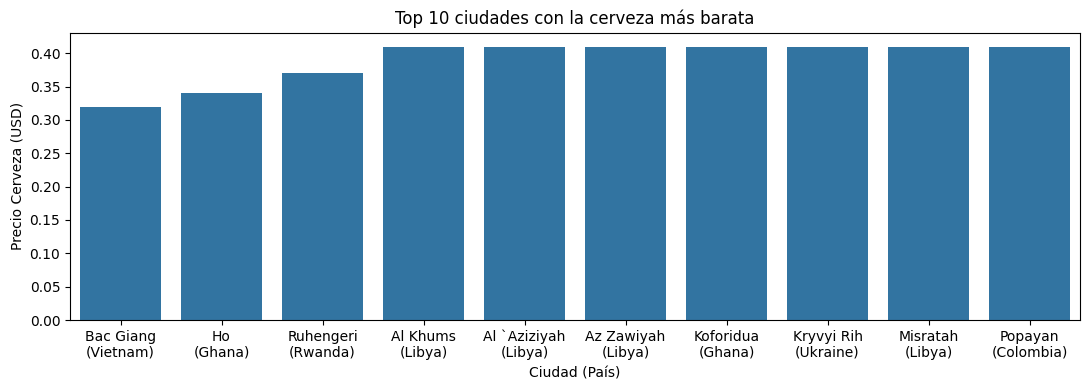

In [28]:
plt.figure(figsize=(11, 4))

top_10_ciudades_baratas = df.groupby('Ciudad')['Cerveza Local Restaurante'].min().nsmallest(10)
top_10_ciudades_baratas_index = [f"{ciudad}\n({df[df['Ciudad'] == ciudad]['Pais'].iloc[0]})" for ciudad in top_10_ciudades_baratas.index]

sns.barplot(x=top_10_ciudades_baratas_index, y=top_10_ciudades_baratas.values)


plt.title('Top 10 ciudades con la cerveza más barata')
plt.xlabel('Ciudad (País)')
plt.ylabel('Precio Cerveza (USD)')
plt.tight_layout()
plt.show()

Un segundo gráfico con las 10 ciudades con la cerveza más cara.

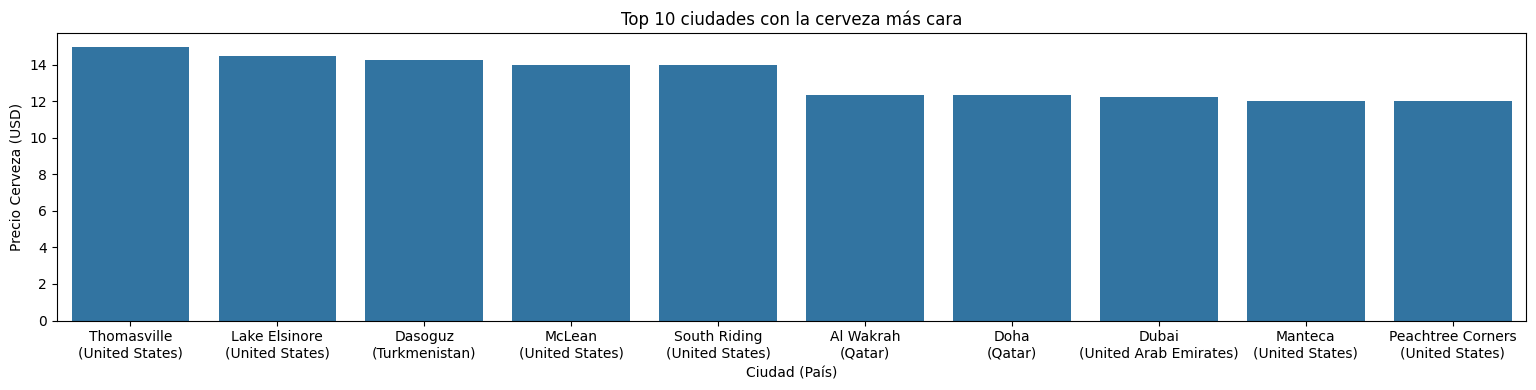

In [29]:
plt.figure(figsize=(15.5, 4))

top_10_ciudades_caras = df.groupby('Ciudad')['Cerveza Local Restaurante'].max().nlargest(10)
top_10_ciudades_caras_index = [f"{ciudad}\n({df[df['Ciudad'] == ciudad]['Pais'].iloc[0]})" for ciudad in top_10_ciudades_caras.index]

sns.barplot(x=top_10_ciudades_caras_index, y=top_10_ciudades_caras.values)


plt.title('Top 10 ciudades con la cerveza más cara')
plt.xlabel('Ciudad (País)')
plt.ylabel('Precio Cerveza (USD)')
plt.tight_layout()
plt.show()

Agregué una nueva columna con la formula llamada 'Cervezas por salario' y verifiqué si se agregó correctamente con algunos encabezados principales.

In [30]:
# Formula 'Cerveza por salario'
df['Cervezas por salario'] = df['Salario neto promedio'] / df['Cerveza Local Restaurante']

# Verificacion de las primeras filas
print(df[['Ciudad', 'Pais', 'Cerveza Local Restaurante', 'Salario neto promedio', 'Cervezas por salario']].head())

     Ciudad         Pais  Cerveza Local Restaurante  Salario neto promedio  \
0     Delhi        India                       1.84                 586.35   
1  Shanghai        China                       1.12                1382.83   
2   Jakarta    Indonesia                       2.02                 483.19   
3    Manila  Philippines                       1.24                 419.02   
4     Seoul  South Korea                       3.02                2672.23   

   Cervezas por salario  
0            318.668478  
1           1234.669643  
2            239.202970  
3            337.919355  
4            884.844371  


Creé un gráfico de dispersion, para visualizar que paises pueden comprar más cervezas gracias a la formula creada anteriormente sobre la relación entre el precio y el salario promedio.
En este gráfico se puede observar que la mayor cantidad de los precios y a su vez de cervezas comprables,  se concentra entre los 0 y los 9 dólares, y entre las 0 y las 1500 cervezas por salario aproximandamente.

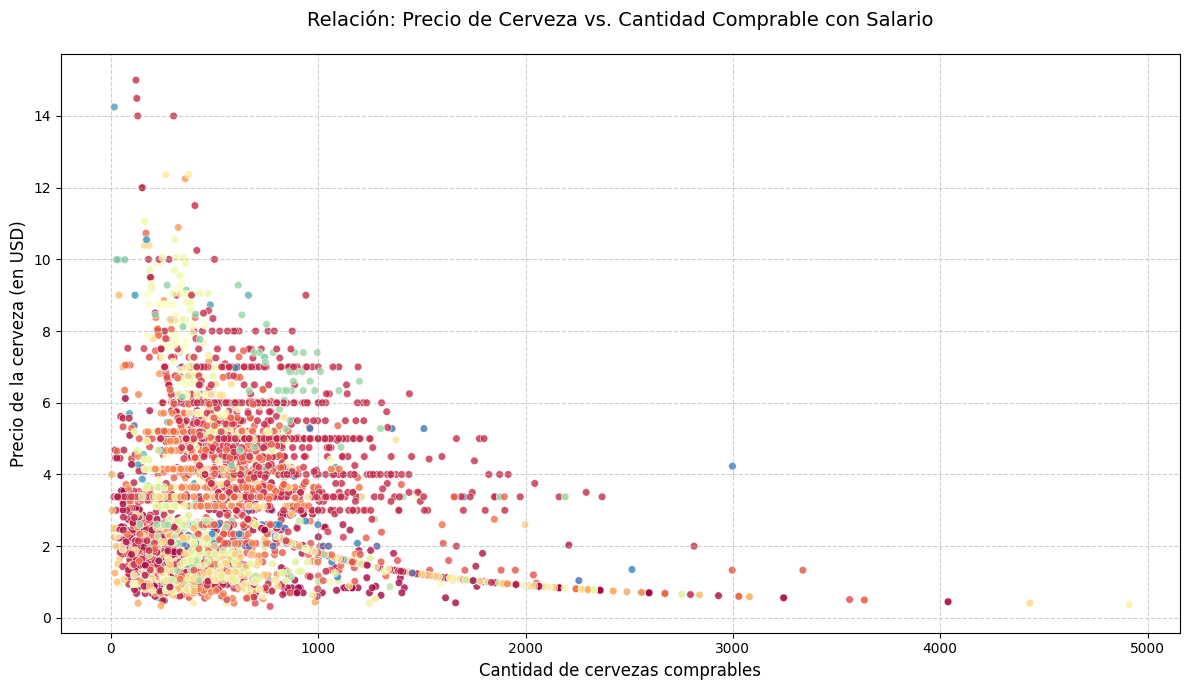

In [31]:
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df,
    x="Cervezas por salario",       # Cantidad calculada
    y="Cerveza Local Restaurante",  # Precio de la cerveza
    hue="Pais",                     # Color por país
    s=30,                          # Tamaño de los puntos
    palette="Spectral",               # Mapa de colores
    alpha=0.8,                       # Transparencia
    legend=False,
)

plt.title("Relación: Precio de Cerveza vs. Cantidad Comprable con Salario", fontsize=14, pad=20)
plt.ylabel("Precio de la cerveza (en USD)", fontsize=12)
plt.xlabel("Cantidad de cervezas comprables", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Aquí creé un gráfico de cajas para identificar los outliers en relación a los precios. Se puede observar que la mediana ronda casi los 4 dolares, y que a partir de los 9 dólares empiezan a haber valores atípicos.

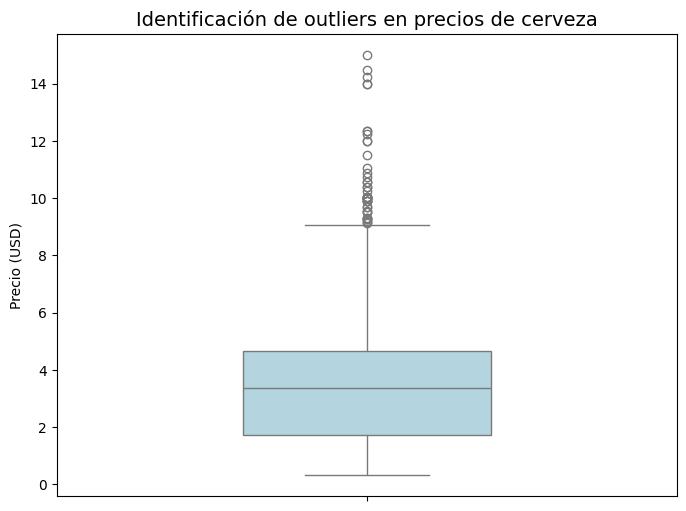

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    y="Cerveza Local Restaurante",
    color="lightblue",
    width=0.4
)
plt.title("Identificación de outliers en precios de cerveza", fontsize=14)
plt.ylabel("Precio (USD)")
plt.show()

Aquí creé dos histogramas superpuestos para observar la frecuencia en la aparición de los precios, tanto para la 'Cerveza Local Restaurante' como para la 'Cerveza Local Supermercado' ambas de 0.5 L. Con KDE para suavizar la diferencia en las densidades.

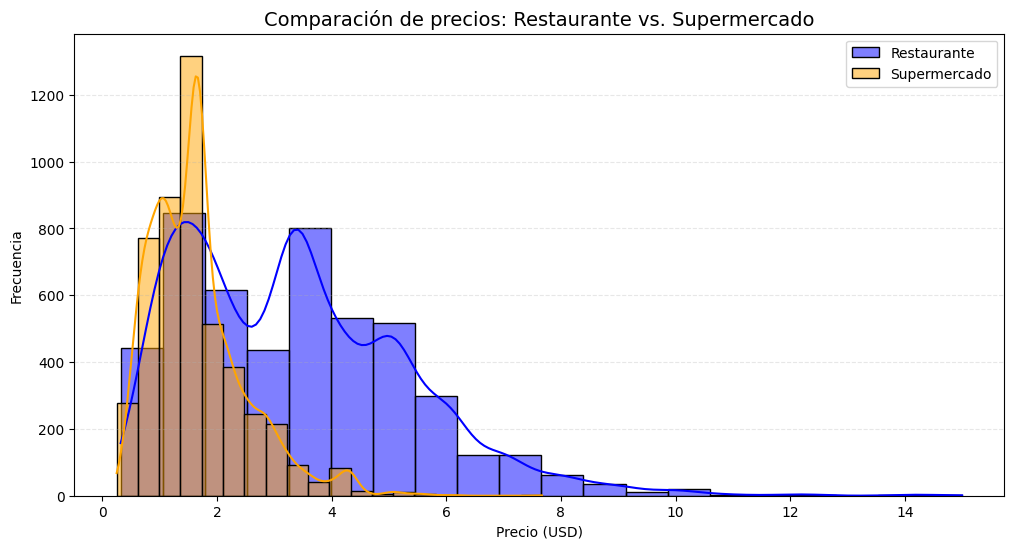

In [33]:
plt.figure(figsize=(12, 6))

# Histograma para restaurantes
sns.histplot(
    data=df,
    x="Cerveza Local Restaurante",
    bins=20,
    kde=True,
    color="blue",
    label="Restaurante",
    alpha=0.5
)

# Histograma para supermercados
sns.histplot(
    data=df,
    x="Cerveza Local Supermercado",
    bins=20,
    kde=True,
    color="orange",
    label="Supermercado",
    alpha=0.5
)

plt.title("Comparación de precios: Restaurante vs. Supermercado", fontsize=14)
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()

Aquí creé una formula para hacer un ranking con los diez países que más cantidad de cervezas pueden comprar con su salario promedio y un respectivo gráfico. Luego lo mismo pero para los diez países que menos cervezas pueden comprar.

In [34]:
top_10_mas = (
    df.groupby('Pais')['Cervezas por salario']
    .mean()
    .nlargest(10)
    .reset_index()
)
top_10_mas['Ranking'] = range(1, 11)


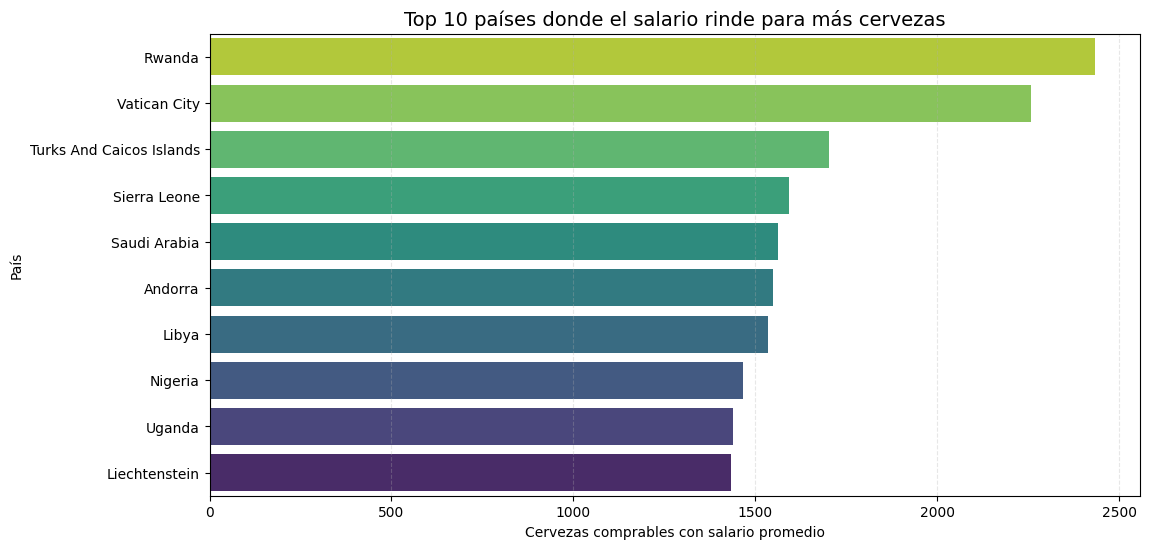

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_mas,
    x='Cervezas por salario',
    y='Pais',
    palette='viridis_r',
    hue='Pais',
    legend=False
)
plt.title('Top 10 países donde el salario rinde para más cervezas', fontsize=14)
plt.xlabel('Cervezas comprables con salario promedio')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

In [36]:
print(top_10_mas[['Ranking', 'Pais', 'Cervezas por salario']].set_index('Ranking'))

                             Pais  Cervezas por salario
Ranking                                                
1                          Rwanda           2434.620415
2                    Vatican City           2257.163462
3        Turks And Caicos Islands           1702.829816
4                    Sierra Leone           1592.432990
5                    Saudi Arabia           1562.469667
6                         Andorra           1547.563165
7                           Libya           1536.090561
8                         Nigeria           1467.487834
9                          Uganda           1437.806580
10                  Liechtenstein           1433.904318


In [37]:
top_10_menos = (
    df.groupby('Pais')['Cervezas por salario']
    .mean()
    .nsmallest(10)
    .reset_index()
)
top_10_menos['Ranking'] = range(1, 11)

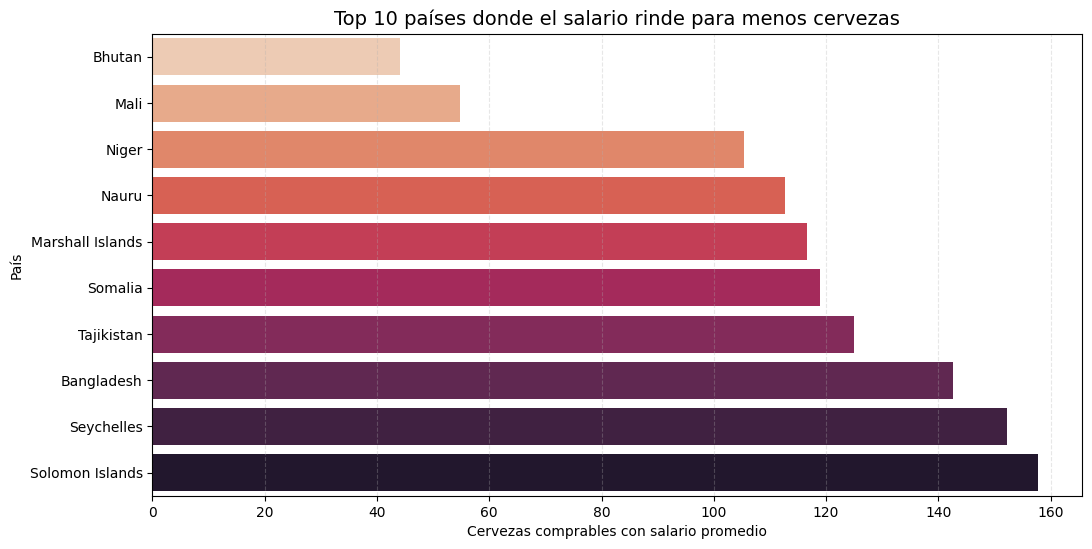

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_menos,
    x='Cervezas por salario',
    y='Pais',
    palette='rocket_r',
    hue='Pais',
    legend=False
)
plt.title('Top 10 países donde el salario rinde para menos cervezas', fontsize=14)
plt.xlabel('Cervezas comprables con salario promedio')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

In [39]:
print(top_10_menos[['Ranking', 'Pais', 'Cervezas por salario']].set_index('Ranking'))

                     Pais  Cervezas por salario
Ranking                                        
1                  Bhutan             44.043710
2                    Mali             54.790000
3                   Niger            105.297980
4                   Nauru            112.604478
5        Marshall Islands            116.666667
6                 Somalia            118.853606
7              Tajikistan            124.903361
8              Bangladesh            142.546008
9              Seychelles            152.167959
10        Solomon Islands            157.774123


Luego de ver estos rankings, surgió la idea de compararlos con sus salarios promedios.
Para ver que correlación tiene el valor de la cerveza con el monto del salario.

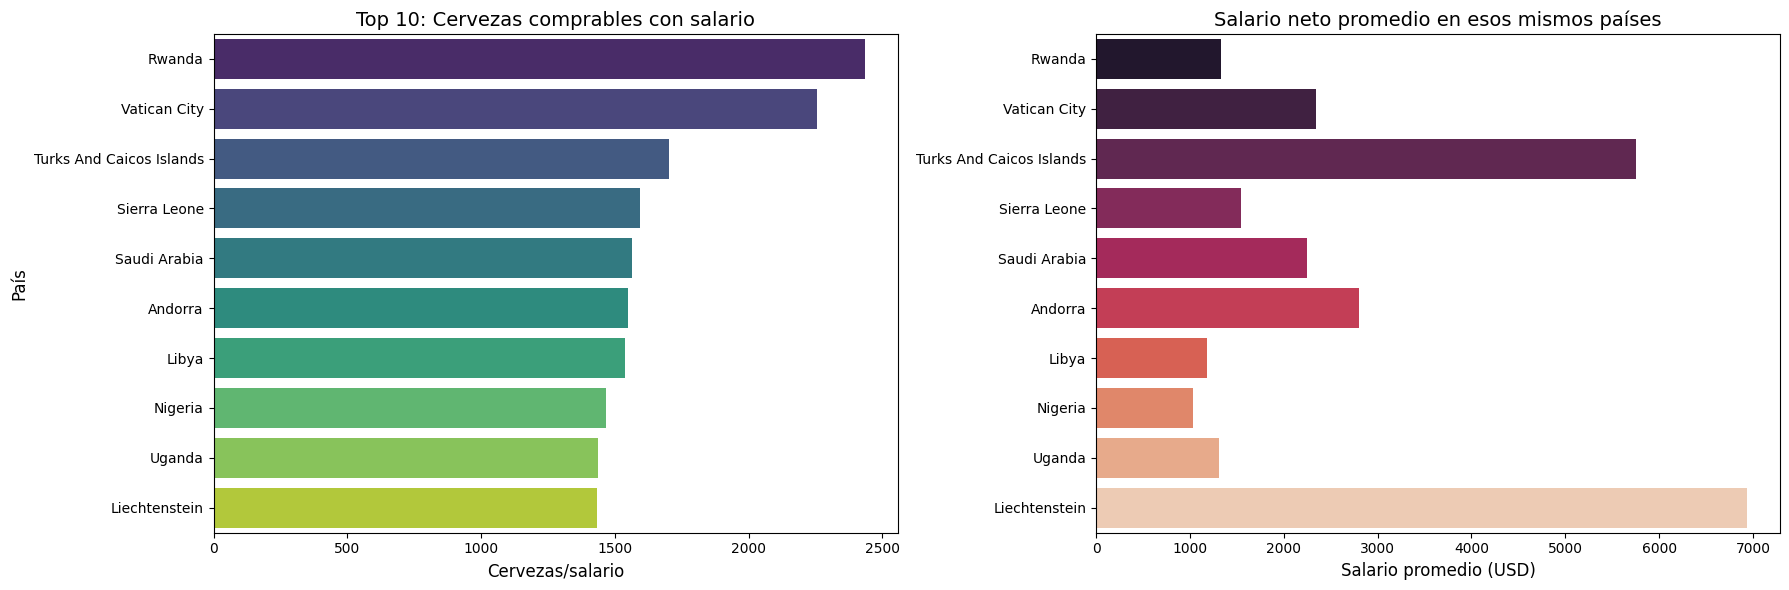

In [42]:

# Calculo de los 10 países con MAS cervezas comprables
top_10_mas = df.groupby('Pais')['Cervezas por salario'].mean().nlargest(10).reset_index()

# Calculo de salario neto promedio de esos mismos 10 países
salarios_top_10 = df[df['Pais'].isin(top_10_mas['Pais'])].groupby('Pais')['Salario neto promedio'].mean().reset_index()

# Orden de los salarios en el mismo orden que el top_10_mas
salarios_top_10 = salarios_top_10.set_index('Pais').loc[top_10_mas['Pais']].reset_index()

plt.figure(figsize=(18, 6))

# Gráfico 1: Cervezas comprables
plt.subplot(1, 2, 1)
sns.barplot(x='Cervezas por salario', y='Pais', data=top_10_mas, palette='viridis', hue='Pais', legend=False)
plt.title('Top 10: Cervezas comprables con salario', fontsize=14)
plt.xlabel('Cervezas/salario', fontsize=12)
plt.ylabel('País', fontsize=12)

# Gráfico 2: Salario neto promedio
plt.subplot(1, 2, 2)
sns.barplot(x='Salario neto promedio', y='Pais', data=salarios_top_10, palette='rocket', hue='Pais', legend=False)
plt.title('Salario neto promedio en esos mismos países', fontsize=14)
plt.xlabel('Salario promedio (USD)', fontsize=12)
plt.ylabel('')  # Ocultar etiqueta duplicada



# Ajustes visuales
plt.tight_layout()
plt.show()

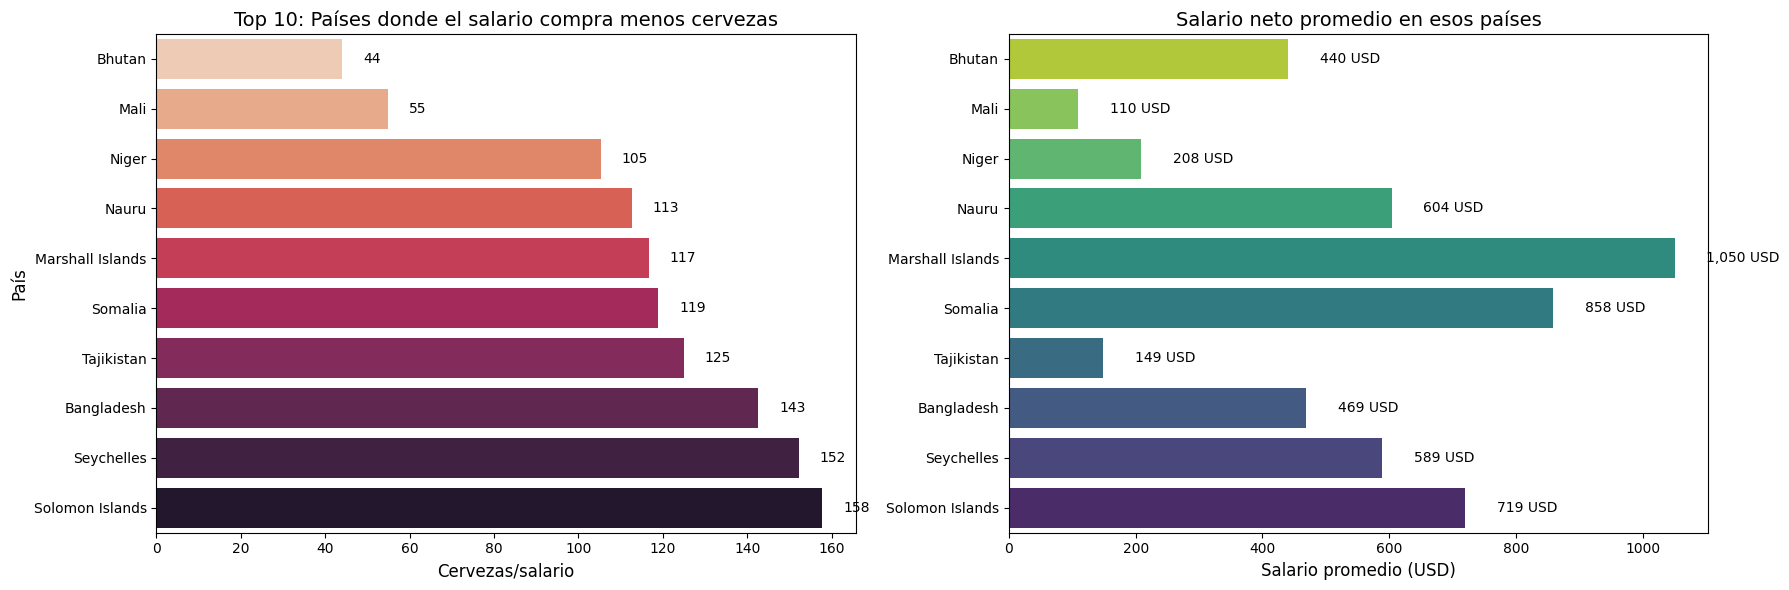

In [43]:
# Calculo de los 10 países con MENOS cervezas comprables
top_10_menos = df.groupby('Pais')['Cervezas por salario'].mean().nsmallest(10).reset_index()

# Calculo  del salario neto promedio de esos mismos países
salarios_top_10_menos = df[df['Pais'].isin(top_10_menos['Pais'])].groupby('Pais')['Salario neto promedio'].mean().reset_index()

# Orden de los salarios en el mismo orden que el top_10_menos
salarios_top_10_menos = salarios_top_10_menos.set_index('Pais').loc[top_10_menos['Pais']].reset_index()

plt.figure(figsize=(18, 6))

# Gráfico 1: Cervezas comprables
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Cervezas por salario', y='Pais', data=top_10_menos, palette='rocket_r', hue='Pais', legend=False)
plt.title('Top 10: Países donde el salario compra menos cervezas', fontsize=14)
plt.xlabel('Cervezas/salario', fontsize=12)
plt.ylabel('País', fontsize=12)

# Añadir etiquetas de valor al gráfico de cervezas
for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 5,
             p.get_y() + p.get_height()/2,
             f'{width:.0f}',
             ha='left',
             va='center')

# Gráfico 2: Salario neto promedio (nuevo)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Salario neto promedio', y='Pais', data=salarios_top_10_menos, palette='viridis_r', hue='Pais', legend=False)
plt.title('Salario neto promedio en esos países', fontsize=14)
plt.xlabel('Salario promedio (USD)', fontsize=12)
plt.ylabel('')  # Ocultar etiqueta duplicada

# Añado etiquetas de valor al gráfico de salarios
for p in ax2.patches:
    width = p.get_width()
    ax2.text(width + 50,
             p.get_y() + p.get_height()/2,
             f'{width:,.0f} USD',
             ha='left',
             va='center')

# Ajustes finales
plt.tight_layout()
plt.show()

Se puede obsevar de los gráficos anteriores que una gran cantidad de precios y salarios estan equilibrados en cuanto al acceso a la cantidad de cervezas comprables. Pero tenemos dos extremos que son la alta accesibilidad y la baja accesibilidad.
La alta accesibilidad se explica por dos factores:

Países ricos: Salarios altos compensan precios altos (ej: USD 5,000/mes + cerveza a USD 6 → 833 cervezas).

Países con cerveza ultra-barata: Salarios bajos pero precios muy bajos (ej: USD 500/mes + cerveza a USD 0.5 → 1,000 cervezas).

En cuanto a la baja accesibilidad:

Paises con salarios muy bajos y cerveza en precio normal.

Paises con salarios bajos y cerveza cara.

# 4. Modelos

Como el conjunto de datos que estoy analizando es en base a valores monetarios ( el precio de la cerveza, y salario neto promedio ), decidi hacer una prueba con 3 modelos de regresión diferentes. Regresión Lineal, regresión Lasso y Random Forest.

# 4.1 Preprocesamiento y división de los datos

Primero importé las librerias para hacer la división entre datos de entrenamiento y de prueba, y para escalar los datos de forma equilibrada



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Luego agregué la función dummies, que convierte las variables categoricas a numeros

In [45]:
df_numeros = pd.get_dummies(df, columns=["Pais"])

Aquí definí las variables de evaluación y entrenamiento

In [46]:
# Aquí definí variables de prediccion (X) y objetivo (y)
X = df_numeros.drop(columns=["Cervezas por salario", "Ciudad"])
y = df_numeros["Cervezas por salario"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=440)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (3411, 261), Test: (1463, 261)


Previamente a la utilización de los modelos hice el escalado de datos.

In [47]:
# Escalado de datos (para Linear y Lasso, no para Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
#importo las librerias
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 4.2 Regresión lineal



In [49]:
# Modelo 1: Regresión Lineal
modelo_lr = LinearRegression() #implementación del modelo
modelo_lr.fit(X_train_scaled, y_train) #entrenamiento del modelo

LinearRegression()

In [50]:
# Prediccion del test
y_pred_lr = modelo_lr.predict(X_test_scaled)

# 4.3 Random forest

In [51]:
# Calculé métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Imprimo métricas
print("\n=== Regresión Lineal ===")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")


=== Regresión Lineal ===
RMSE: 319.72
MAE: 173.60
R²: 0.56


In [52]:
# Modelo 2: Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=440)  #implementación del modelo
modelo_rf.fit(X_train, y_train) #entrenamiento del modelo(no necesita escalado)

RandomForestRegressor(random_state=440)

In [53]:
# Predección en test
y_pred_rf = modelo_rf.predict(X_test)

# Calculo  de métricas
mse_rf = mean_squared_error(y_test, y_pred_lr)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Impresión de métricas
print("\n=== Random Forest ===")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")




=== Random Forest ===
RMSE: 319.72
MAE: 17.46
R²: 0.98


# 4.4 Regresión Lasso

In [54]:
# Modelo 3: Lasso Regression
modelo_lasso = Lasso(alpha=0.1)  #implementación del modelo
modelo_lasso.fit(X_train_scaled, y_train) #entrenamiento del modelo

Lasso(alpha=0.1)

In [55]:
# Prediccion en test
y_pred_lasso = modelo_lasso.predict(X_test_scaled)

# Calculo de métricas
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Impresión de métricas
print("\n=== Lasso Regression ===")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"MAE: {mae_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")



=== Lasso Regression ===
RMSE: 319.57
MAE: 173.18
R²: 0.56


En base a los resultados

In [56]:
# Creé un diccionario con los resultados
resultados_dict = {
    "Linear Regression": {"RMSE": rmse_lr, "MAE": mae_lr, "R²": r2_lr},
    "Random Forest": {"RMSE": rmse_rf, "MAE": mae_rf, "R²": r2_rf},
    "Lasso Regression": {"RMSE": rmse_lasso, "MAE": mae_lasso, "R²": r2_lasso}
}

# Converti a DataFrame
resultados = pd.DataFrame(resultados_dict).T
print(resultados)

                         RMSE         MAE        R²
Linear Regression  319.720363  173.598135  0.558457
Random Forest      319.720363   17.459791  0.980402
Lasso Regression   319.566963  173.179901  0.558881


En base a las métricas obtenidas, se observa que no son valores que se ajusten adecuadamente a los datos analizados, por lo tanto se procede a realizar otro modelo más.


4.5 Random Forest con transformación logarítmica

In [62]:
# Creé variable objetivo transformada
df_numeros["Cervezas_log"] = np.log1p(df["Cervezas por salario"])  # log(1 + x)

# Dividi en train y test (usando la variable transformada)
X = df_numeros.drop(columns=["Cervezas por salario", "Cervezas_log","Ciudad"])
y = df_numeros["Cervezas_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=440)

In [58]:
# Inicio y entrenamiento del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=440)
model_rf.fit(X_train, y_train)

# Predicción en test (en escala logarítmica)
y_pred_log = model_rf.predict(X_test)

# Conversión de predicciones a escala original
y_pred = np.expm1(y_pred_log)  # Inversa de log(1 + x)
y_test_original = np.expm1(y_test)

In [59]:
# Calculo de métricas
mse_log_real = mean_squared_error(y_test_original, y_pred)
rmse_log_real = np.sqrt(mse_log_real)
mae_log_real = mean_absolute_error(y_test_original, y_pred)
r2_log_real = r2_score(y_test_original, y_pred)

# Impresión de métricas
print("\n=== Random Forest Logaritmica ===")
print(f"RMSE: {rmse_log_real:.2f}")
print(f"MAE: {mae_log_real:.2f}")
print(f"R²: {r2_log_real:.2f}")


=== Random Forest Logaritmica ===
RMSE: 72.68
MAE: 17.69
R²: 0.98


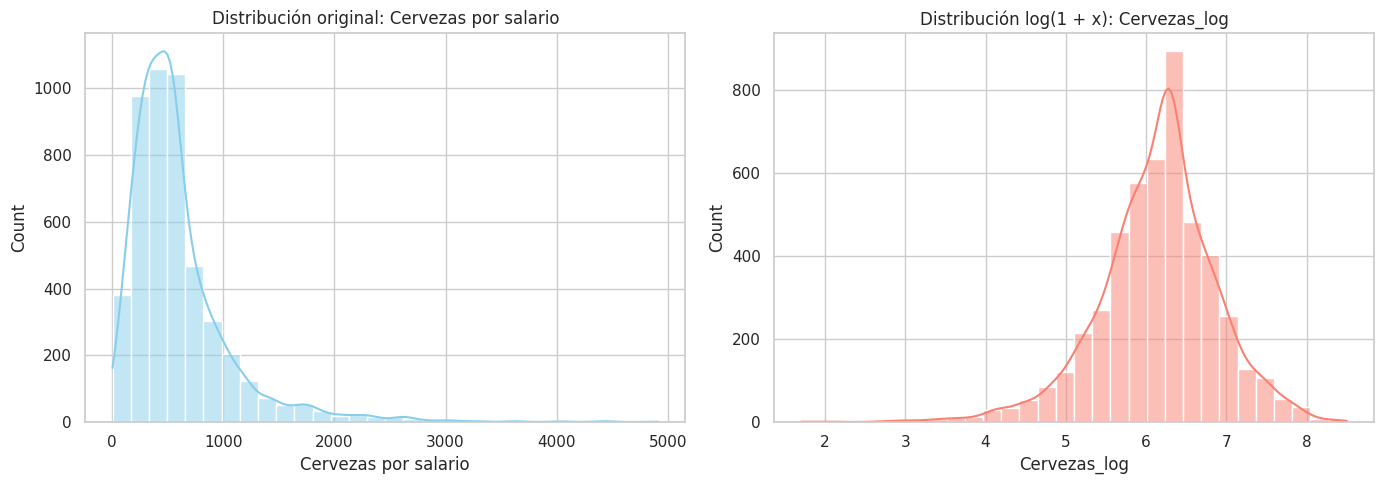

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo de seaborn
sns.set(style="whitegrid")

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma original
sns.histplot(df["Cervezas por salario"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribución original: Cervezas por salario")

# Histograma transformado
sns.histplot(df_numeros["Cervezas_log"], bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Distribución log(1 + x): Cervezas_log")

plt.tight_layout()
plt.show()


In [66]:
print("Skew original:", df["Cervezas por salario"].skew())
print("Skew log(1 + x):", df_numeros["Cervezas_log"].skew())

Skew original: 2.6309582732646133
Skew log(1 + x): -0.5269408624359883


Skew original: 2.63

Interpretación:
Asimetría positiva pronunciada (derecha).
La cola de la distribución se extiende hacia valores altos.

La mayoría de los países tienen un número de cervezas comprables moderado, pero unos pocos países (ej: Siria, Myanmar) tienen valores extremadamente bajos ("arrastran" la distribución a la izquierda).

Los modelos lineales (como regresión) pueden verse afectados por esta asimetría, generando predicciones sesgadas.

Skew log(1 + x): -0.53

Interpretación:
Asimetría leve a la izquierda (colas hacia valores bajos).

La transformación logarítmica logró corregir la asimetría original, redujo el impacto de los valores extremos bajos (ej: países con muy pocas cervezas comprables), equilibrando la distribución.

Implicación: Mejoró el rendimiento del modelo.

In [67]:
# Datos de las métricas
data = {
    'Modelo': ['Linear Regression', 'Lasso Regression', 'Random Forest', 'Random Forest (log)'],
    'RMSE': [rmse_lr, rmse_lasso, rmse_rf, rmse_log_real],
    'MAE': [mae_lr, mae_lasso, mae_rf, mae_log_real],
    'R²': [r2_lr, r2_lasso, r2_rf, r2_log_real]
}

# Creo el DataFrame
tabla_comparativa = pd.DataFrame(data)

print(tabla_comparativa)

                Modelo        RMSE         MAE        R²
0    Linear Regression  319.720363  173.598135  0.558457
1     Lasso Regression  319.566963  173.179901  0.558881
2        Random Forest  319.720363   17.459791  0.980402
3  Random Forest (log)   72.680008   17.685304  0.977183


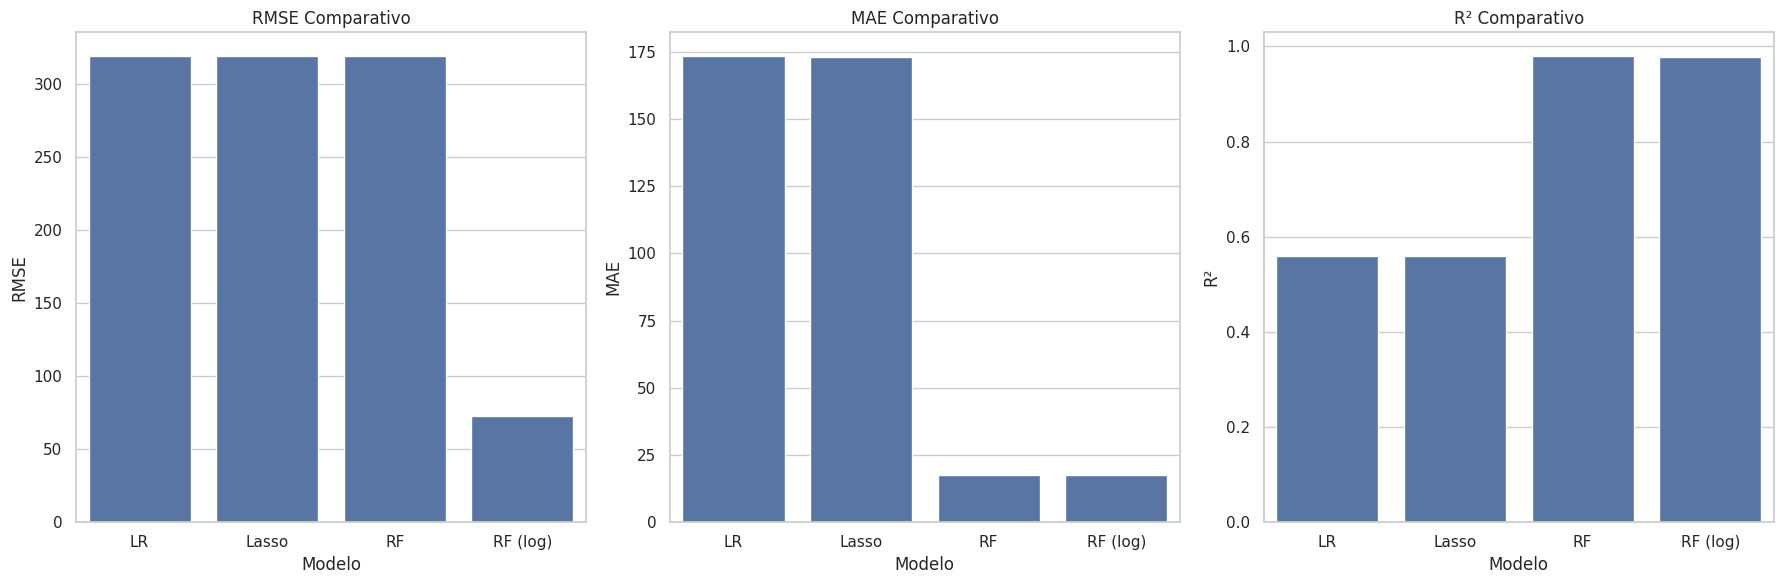

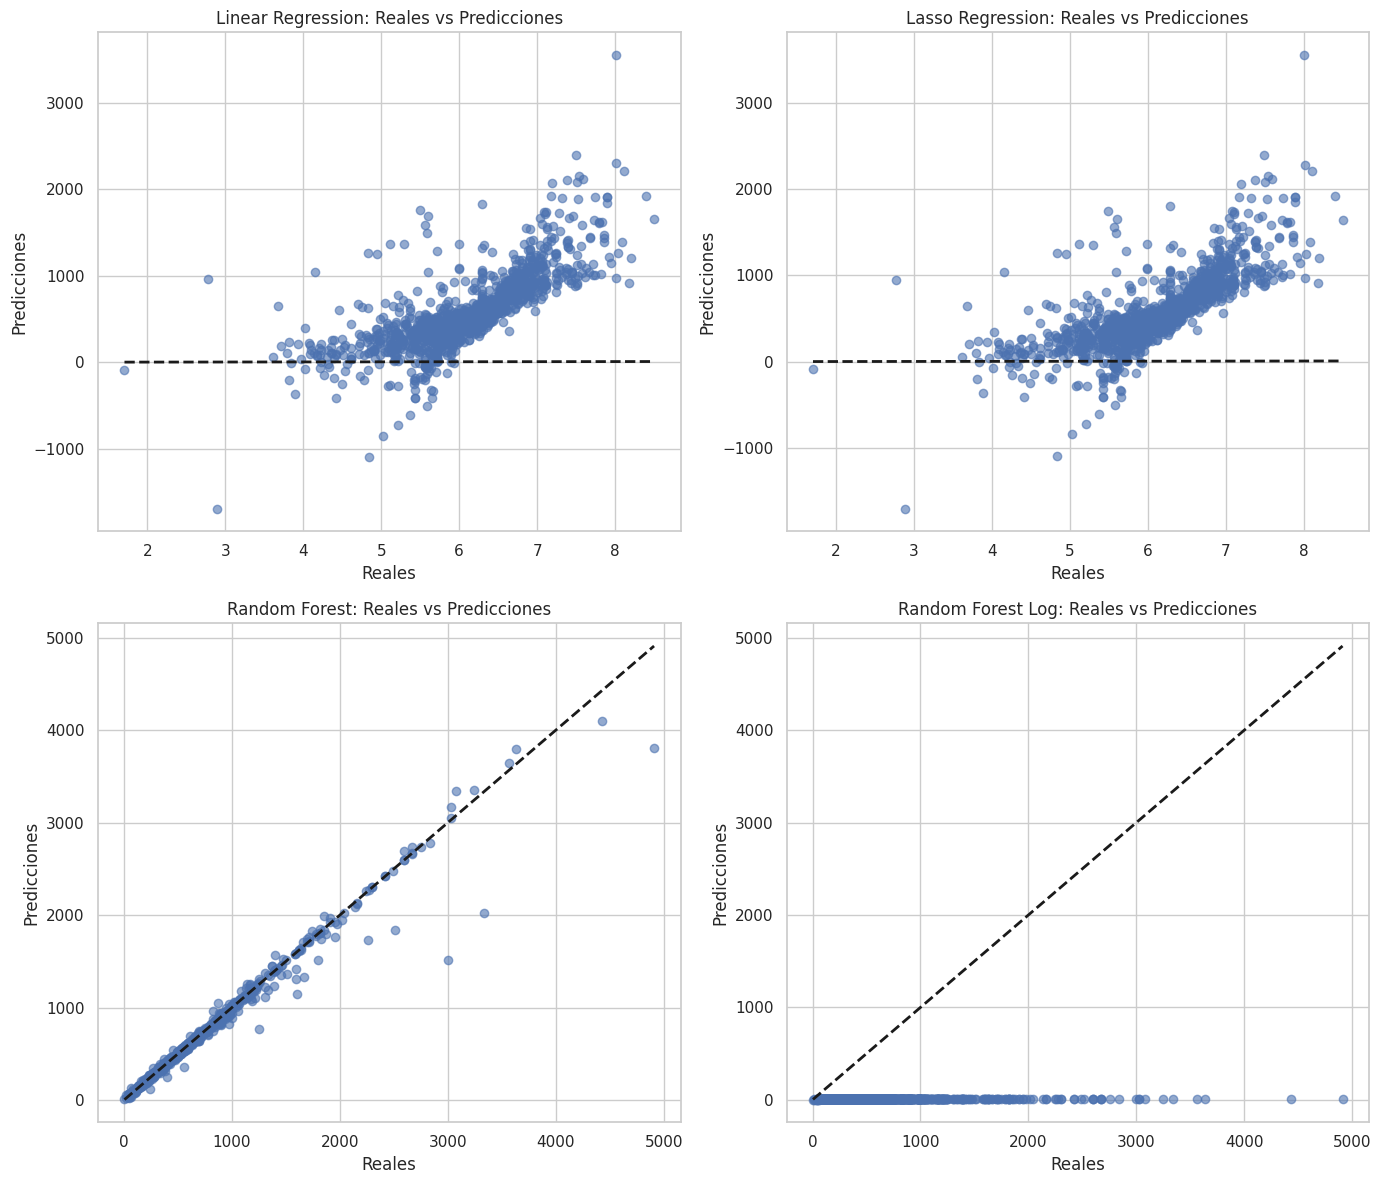

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

tabla_comparativa['Modelo'] = tabla_comparativa['Modelo'].replace({
    'Linear Regression': 'LR',
    'Lasso Regression': 'Lasso',
    'Random Forest': 'RF',
    'Random Forest (log)': 'RF (log)'
})

# Gráfico de barras para RMSE, MAE, y R²
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# RMSE
sns.barplot(x='Modelo', y='RMSE', data=tabla_comparativa, ax=ax[0])
ax[0].set_title('RMSE Comparativo')
ax[0].set_ylabel('RMSE')

# MAE
sns.barplot(x='Modelo', y='MAE', data=tabla_comparativa, ax=ax[1])
ax[1].set_title('MAE Comparativo')
ax[1].set_ylabel('MAE')

# R²
sns.barplot(x='Modelo', y='R²', data=tabla_comparativa, ax=ax[2])
ax[2].set_title('R² Comparativo')
ax[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Gráfico de dispersión para comparar predicciones reales vs predicciones de los modelos
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Predicciones vs Reales para Linear Regression
ax[0, 0].scatter(y_test, y_pred_lr, alpha=0.6)
ax[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0, 0].set_title('Linear Regression: Reales vs Predicciones')
ax[0, 0].set_xlabel('Reales')
ax[0, 0].set_ylabel('Predicciones')

# Predicciones vs Reales para Lasso
ax[0, 1].scatter(y_test, y_pred_lasso, alpha=0.6)
ax[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0, 1].set_title('Lasso Regression: Reales vs Predicciones')
ax[0, 1].set_xlabel('Reales')
ax[0, 1].set_ylabel('Predicciones')

# Predicciones vs Reales para Random Forest
ax[1, 0].scatter(y_test_original, y_pred, alpha=0.6)
ax[1, 0].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
ax[1, 0].set_title('Random Forest: Reales vs Predicciones')
ax[1, 0].set_xlabel('Reales')
ax[1, 0].set_ylabel('Predicciones')

# Predicciones vs Reales para Random Forest Log
ax[1, 1].scatter(y_test_original, y_pred_log, alpha=0.6)
ax[1, 1].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
ax[1, 1].set_title('Random Forest Log: Reales vs Predicciones')
ax[1, 1].set_xlabel('Reales')
ax[1, 1].set_ylabel('Predicciones')

plt.tight_layout()
plt.show()


# Conclusiones

Conclusión basada en las métricas proporcionadas:

Modelos lineales (Linear y Lasso Regression):

Bajo rendimiento general (R² ≈ 0.55), lo que indica que explican solo el 55% de la varianza de los datos.

Altos errores (RMSE ≈ 319, MAE ≈ 173): Predicciones poco precisas, con desviaciones promedio de ~173 USD.

Limitación: Modelos demasiado simples para capturar la complejidad del fenómeno analizado.

Random Forest estándar:

Excelente ajuste (R² = 0.98), pero alto RMSE (≈319) y MAE bajo (≈17.5).

Interpretación: Aunque explica el 98% de la varianza, el alto RMSE sugiere errores graves en algunas predicciones, esto se debe a lo irregular de algunos valores de la cerveza en algunos paises, en comparación con la media.

Random Forest con transformación logarítmica:

Mejor equilibrio (RMSE = 72.68, MAE ≈17.68, R² = 0.977).

La transformación logarítmica mitiga el efecto de outliers, mejorando la generalización.

En base a lo analizado se podría decir que modelo óptimo es: Random Forest (log), por su equilibrio entre precisión (R² > 0.97) y robustez (RMSE reducido en 77% vs. versiones lineales).

Sin embargo, la diferencia entre RMSE y MAE en Random Forest sugiere la presencia de valores atípicos que distorsionan las predicciones, pero al ser valores de las economias de los paises no podemos eliminar esos outliers, pero podrian ser tratados más intensivamente.

